# Resolução de Exercício de Avaliação 

Este notebook contém a resolução de três questões usando métodos numéricos em Python, abordando os seguintes tópicos:

1. Método de Euler e Runge-Kutta de 3ª ordem.
2. Movimento de um projétil com resistência do ar.
3. Crescimento populacional usando a equação logística.

## Importação de Bibliotecas

In [1]:
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

### Questão 1: Método de Euler e Runge-Kutta de 3ª Ordem
Calcular o valor de y(1) usando os métodos de Euler e Runge-Kutta de 3ª ordem.
E calcular o erro absoluto erro absoluto cometido na aproximação de y (1) usando os dois métodos. 


#### Código para Métodos de Euler e Runge-Kutta

In [2]:
# Definindo a função diferencial de acordo com o PVI
def f(x, y):
    return (y**2 - 2*x) / y

In [3]:
# Método de Euler
def euler_method(f, x0, y0, h, n):
    x, y = x0, y0
    results = []
    for i in range(n):
        y += h * f(x, y)
        x += h  
        results.append([i+1, x, y])  # Guarda os valores de n, xn, yn
    return results

In [4]:
# Método de Runge-Kutta de 3ª ordem
def runge_kutta_3rd_order(f, x0, y0, h, n):
    x, y = x0, y0
    results = []
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h, y - k1 + 2 * k2)
        y += (k1 + 4 * k2 + k3) / 6
        x += h
        results.append([i+1, x, k1, k2, k3, y])
    return results


In [5]:
#função exata 
def y_exact(x):
    return math.sqrt(2 * x + 1)

In [6]:
# Função para plotar o grafico de comparação 
def plot_numeric_vs_exact(results, y_exact, filename, col_x, col_y):
    x_values = [row[col_x] for row in results]  # Valores de x
    y_numeric_values = [row[col_y] for row in results]  # Valores de y aproximados (Método de Euler)
    y_exact_values = [y_exact(x) for x in x_values]  # Valores de y exatos

    # Plot das soluções
    plt.plot(x_values, y_numeric_values, label="Solução Numérica", marker='o', linestyle='--', color='blue', linewidth=2, alpha=0.8)
    plt.plot(x_values, y_exact_values, label="Solução Exata", marker='x', linestyle='-', color='red', linewidth=2.5, alpha=0.8)

    # Configurações do gráfico
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Salva o gráfico em um arquivo
    plt.savefig(filename)
    print(f"Gráfico salvo como '{filename}'")
    plt.show()


In [7]:
# Parâmetros iniciais
x0 = 0
y0 = 1
h = 0.2
x_final = 1
n = int((x_final - x0) / h)

In [8]:
# Solução usando Método de Euler
results = euler_method(f, x0, y0, h, n)

In [9]:
#Adicionando o y exato e o erro na tabela
for row in results:
    xn = row[1]
    yn = row[2]
    y_exact_value = y_exact(xn)  # Calcula o valor exato de y para o xn
    erro = abs(y_exact_value - yn)  # Calcula o erro
    row.append(y_exact_value)  # Adiciona o y_exact na tabela
    row.append(erro)  # Adiciona o erro na tabela

In [10]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "yn", "y_exact", "erro"], tablefmt="fancy_grid"))

╒═════╤══════╤═════════╤═══════════╤═══════════╕
│   n │   xn │      yn │   y_exact │      erro │
╞═════╪══════╪═════════╪═══════════╪═══════════╡
│   1 │  0.2 │ 1.2     │   1.18322 │ 0.016784  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   2 │  0.4 │ 1.37333 │   1.34164 │ 0.0316925 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   3 │  0.6 │ 1.5315  │   1.48324 │ 0.0482554 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   4 │  0.8 │ 1.68108 │   1.61245 │ 0.068633  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   5 │  1   │ 1.82695 │   1.73205 │ 0.0948974 │
╘═════╧══════╧═════════╧═══════════╧═══════════╛


Gráfico salvo como 'euler_grafico.png'


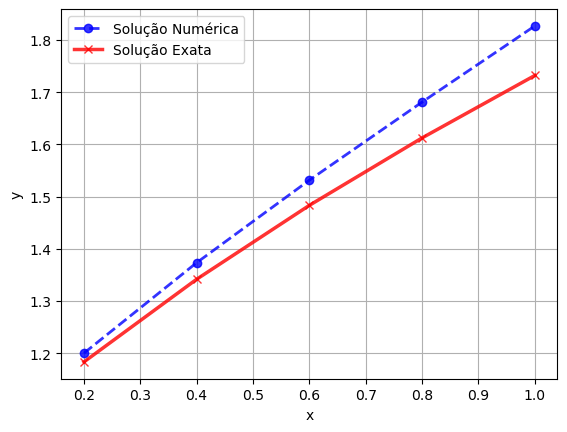

In [11]:
#plota grafico
plot_numeric_vs_exact(results, y_exact, "euler_grafico.png", 1, 2)

In [12]:
# Solução usando Runge-Kutta de 3ª ordem
results = runge_kutta_3rd_order(f, x0, y0, h, n)

In [13]:
for row in results:
    xn = row[1]
    yn = row[5]
    y_exact_value = y_exact(xn)  # Calcula o valor exato de y para o xn
    erro = abs(y_exact_value - yn)  # Calcula o erro
    row.append(y_exact_value)  # Adiciona o y_exact na tabela
    row.append(erro)  # Adiciona o erro na tabela

In [14]:
# Solução exata para y(1)
y_exact = math.sqrt(2 * 1 + 1)

In [15]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "k1", "k2", "k3", "yn", "y_exact", "erro"], tablefmt="fancy_grid"))

╒═════╤══════╤══════════╤══════════╤══════════╤═════════╤═══════════╤═════════════╕
│   n │   xn │       k1 │       k2 │       k3 │      yn │   y_exact │        erro │
╞═════╪══════╪══════════╪══════════╪══════════╪═════════╪═══════════╪═════════════╡
│   1 │  0.2 │ 0.2      │ 0.183636 │ 0.164919 │ 1.18324 │   1.18322 │ 2.80725e-05 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   2 │  0.4 │ 0.169038 │ 0.158898 │ 0.14628  │ 1.34173 │   1.34164 │ 8.81012e-05 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   3 │  0.6 │ 0.149097 │ 0.14204  │ 0.132819 │ 1.48341 │   1.48324 │ 0.000168622 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   4 │  0.8 │ 0.134892 │ 0.129625 │ 0.122519 │ 1.61273 │   1.61245 │ 0.000275518 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   5 │  1   │ 0.124124 │ 0.120005 │ 0.114324 │ 1.73247 │   1.73205 │ 0.0004

In [16]:
#plota grafico
plot_numeric_vs_exact(results, y_exact, "hk3_grafico.png", 1, 5)

TypeError: 'float' object is not callable

In [ ]:

# erro_euler = abs(y_exact - y_euler)
# erro_rk3 = abs(y_exact - y_rk3)

# print(f"Valor de y(1) usando Método de Euler: {y_euler}")
# print(f"Valor de y(1) usando Runge-Kutta de 3ª ordem: {y_rk3}")
# print(f"Solução exata de y(1): {y_exact}")
# print(f"Erro absoluto no Método de Euler: {erro_euler}")
# print(f"Erro absoluto no Método de Runge-Kutta de 3ª ordem: {erro_rk3}")

### Questão 2: Movimento de um projétil
Calcular a velocidade de um projétil considerando a resistência do ar e encontrar o tempo no qual o projétil começa a cair.

#### Código para Simulação do Movimento

In [25]:
# Definindo a função diferencial de acordo com o PVI
def f2(x, y):
    return (-9.8 - (0.002/0.11)*y*abs(y))

In [26]:
results = euler_method(f2, 0, 8, 0.1, 10)

In [27]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "yn"], tablefmt="fancy_grid"))

╒═════╤══════╤═══════════╕
│   n │   xn │        yn │
╞═════╪══════╪═══════════╡
│   1 │  0.1 │  6.90364  │
├─────┼──────┼───────────┤
│   2 │  0.2 │  5.83698  │
├─────┼──────┼───────────┤
│   3 │  0.3 │  4.79504  │
├─────┼──────┼───────────┤
│   4 │  0.4 │  3.77323  │
├─────┼──────┼───────────┤
│   5 │  0.5 │  2.76735  │
├─────┼──────┼───────────┤
│   6 │  0.6 │  1.77342  │
├─────┼──────┼───────────┤
│   7 │  0.7 │  0.787703 │
├─────┼──────┼───────────┤
│   8 │  0.8 │ -0.193425 │
├─────┼──────┼───────────┤
│   9 │  0.9 │ -1.17336  │
├─────┼──────┼───────────┤
│  10 │  1   │ -2.15085  │
╘═════╧══════╧═══════════╛


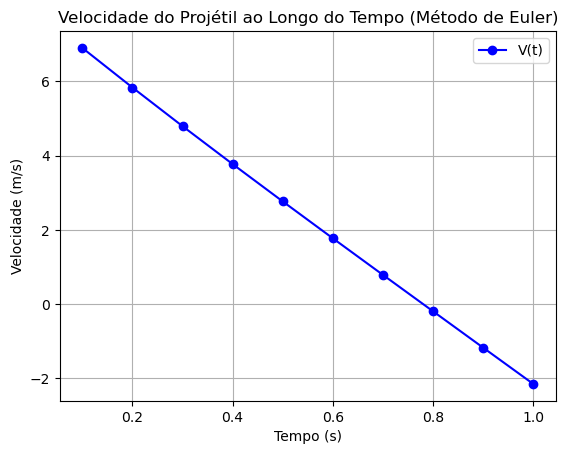

In [28]:
# Pegando os valores de x e y para plotar o gráfico
xn_values = [row[1] for row in results2]
yn_values = [row[2] for row in results2]

# Plotando
plt.plot(xn_values, yn_values, marker='o', linestyle='-', color='b', label="V(t)")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.title("Velocidade do Projétil ao Longo do Tempo (Método de Euler)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Trazendo para esse notebook os códigos feitos para a Apresentação do Seminário sobre Método dos Mínimos Quadrados

#Introduza os valores desejados para os pontos xi e yi

xn_values
yn_values

n = len(xn_values)

In [33]:
#Convertendo xn_values e yn_values para arrays NumPy
xn_values = np.array(xn_values)
yn_values = np.array(yn_values)

In [34]:
#Calculando os somatórios necessários para a aplicação do método dos mínimos quadrados
sum_xi = np.sum(xn_values)
sum_xi2 = np.sum(xn_values**2)
sum_yi = np.sum(yn_values)
sum_xy = np.sum(xn_values*yn_values)

In [35]:
#Definindo o valor do coeficiente angular a
a = (n*sum_xy - sum_xi*sum_yi)/(n*sum_xi2 - sum_xi**2)

#Definindo o valor do coeficiente linear b
b = (sum_yi - a*sum_xi)/n

#Printando a funçåo descoberta pelo método dos mínimos quadrados
print('y =', a, 'x + ', b)

y = -10.027611854505075 x +  7.827158214452855


In [24]:
#Dada a função y = ax + b, podemos calcular os valores de x para quando y = 0
x_zero = -b/a

print('x =', x_zero, 'quando y = 0')

x = 0.6153243296260631 quando y = 0


In [ ]:
#Trazendo para esse notebook os códigos feitos para a Apresentação do Seminário sobre Método dos Mínimos Quadrados

#Introduza os valores desejados para os pontos xi e yi

xn_values
yn_values

n = len(xn_values)

### Questão 3: Crescimento Populacional
Calcular a população estimada depois de 5 anos utilizando Runge-Kutta de ordem 4.

#### Código para Métodos de Runge-Kutta

In [ ]:
# Definindo a função f(t, P) que representa a taxa de variação dP/dt
def dP_dt(P, b, k):
    return b * P - k * P**2

In [ ]:
# Método de Runge-Kutta de quarta ordem
def runge_kutta_4(P0, b, k, t_final, h):
    t = 0
    P = P0
    results = []
    cont = 0
    while t < t_final:
        # Coeficientes de Runge-Kutta
        k1 = h * dP_dt(P, b, k)
        k2 = h * dP_dt(P + 0.5 * k1, b, k)
        k3 = h * dP_dt(P + 0.5 * k2, b, k)
        k4 = h * dP_dt(P + k3, b, k)
        
        # Atualiza a população
        P += (k1 + 2*k2 + 2*k3 + k4) / 6

        cont = cont + 1

        results.append([cont, t, k1, k2, k3, k4, P])
        # Atualiza o tempo
        t += h
        

        
        
    
    return results

In [ ]:
# Parâmetros
P0 = 50976  # População inicial
b = 2.9e-2  # Taxa de nascimentos
k = 1.4e-7  # Constante de mortalidade proporcional
t_final = 5  # Tempo final em anos
h = 0.1  # Passo de tempo

In [ ]:
# Calculando a população estimada após 5 anos
results = runge_kutta_4(P0, b, k, t_final, h)
print(tabulate(results, headers=["n", "xn", "k1", "k2", "k3", "k4", "yn"], tablefmt="fancy_grid"))

╒═════╤══════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│   n │   xn │      k1 │      k2 │      k3 │      k4 │      yn │
╞═════╪══════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│   1 │  0.1 │ 111.451 │ 111.533 │ 111.533 │ 111.615 │ 51087.5 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   2 │  0.2 │ 111.615 │ 111.697 │ 111.697 │ 111.779 │ 51199.2 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   3 │  0.3 │ 111.779 │ 111.861 │ 111.861 │ 111.943 │ 51311.1 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   4 │  0.4 │ 111.943 │ 112.024 │ 112.024 │ 112.106 │ 51423.1 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   5 │  0.5 │ 112.106 │ 112.188 │ 112.188 │ 112.27  │ 51535.3 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   6 │  0.6 │ 112.27  │ 112.352 │ 112.352 │ 112.433 │ 51647.7 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   7 │  0.7 │ 112.433 │ 